In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"

import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick

import seaborn as sns

import wf_psf as wf



In [2]:


args = {
    'id_name': '_wf_PR_NewPRoj_12_cycles_v2' ,
    'suffix_id_name': 'v2' ,
    'base_id_name': '_wf_PR_NewPRoj_12_cycles_' ,
    'eval_only_param': False ,
    'total_cycles': 12 ,
    'saved_cycle': 'cycle12' ,
    'reset_dd_features': True ,
    'eval_only_param': False ,
    'project_dd_features': True ,
    'd_max': 2 ,
    'n_zernikes': 45 ,
    'save_all_cycles': True ,
    'n_bins_lda': 8,
    'n_bins_gt': 8,
    'output_dim': 32,
    'batch_size': 32,
    'oversampling_rate': 3.,
    'output_q': 3.,
    'sed_sigma': 0.,
    'x_lims': [0, 1e3],
    'y_lims': [0, 1e3],
    'sed_interp_kind': 'linear',
    'interp_pts_per_bin': 0,
    'extrapolate': True,
    'opt_stars_rel_pix_rmse': True ,
    'eval_mono_metric_rmse': False,
    'eval_opd_metric_rmse': True,
    'eval_train_shape_sr_metric_rmse': True,
    'pupil_diameter': 256 ,
    'n_epochs_param_multi_cycle': "0" ,
    'n_epochs_non_param_multi_cycle': "75" ,
    'l_rate_non_param_multi_cycle': "0.1" ,
    'l_rate_param_multi_cycle': "0" ,
    'l_rate_param': None,
    'l_rate_non_param': None,
    'n_epochs_param': None,
    'n_epochs_non_param': None,
    'model': 'poly' ,
    'model_eval': 'poly' ,
    'cycle_def': 'complete' ,
    'gt_n_zernikes': 45 ,
    'd_max_nonparam': 5 ,
    'saved_model_type': 'external' ,
    'use_sample_weights': True ,
    'l2_param': 0. ,
    'interpolation_type': 'none' ,
    'eval_batch_size': 16 ,
    'train_opt': True ,
    'eval_opt': True ,
    'plot_opt': True ,
    'dataset_folder': '/disk/xray0/tl3/datasets/wf-phase-retrieval/data/',
    'test_dataset_file': 'test_Euclid_res_id_010_8_bins.npy',
    'train_dataset_file': 'train_Euclid_res_2000_TrainStars_id_010_8_bins.npy',
    'base_path': '/disk/xray0/tl3/outputs/wf-phase-retrieval/wf-outputs/',
    'metric_base_path': '/disk/xray0/tl3/outputs/wf-phase-retrieval/wf-outputs/metrics/',
    'chkp_save_path': '/disk/xray0/tl3/outputs/wf-phase-retrieval/wf-outputs/chkp/chkp_callback_poly_wf_PR_NewPRoj_12_cycles_v2_cycle%d',
    'plots_folder': 'plots/' ,
    'model_folder': 'chkp/' ,
    'log_folder': 'log-files/' ,
    'optim_hist_folder': 'optim-hist/' ,
    'star_numbers': 1 ,
}


In [14]:
base_path = '/disk/xray0/tl3/outputs/wf-phase-retrieval/wf-outputs/'
log_folder = 'log-files/'
metric_base_path = '/disk/xray0/tl3/outputs/wf-phase-retrieval/wf-outputs/metrics/'


# base_id_name = '_wf_PR_12_cycles_v1_'
# eval_cycle = 'cycle1'

args['base_path'] = base_path
args['log_folder'] = log_folder
args['metric_base_path'] = metric_base_path


save_dir = '/disk/xray0/tl3/repos/wf-psf/experiments/phase-retrieval-optical-prior/plots/poster_plots/'


e1_req_euclid = 2e-04
e2_req_euclid = 2e-04
R2_req_euclid = 1e-03



In [4]:
metrics_base_id_name_list = [
    'metrics-poly_wf_PR_NewPRoj_12_cycles_v2',
    'only_param_eval/metrics-poly_wf_PR_NewPRoj_12_cycles_v2',
]

eval_cycle_base_id_list = [12,12]#,12,18,18,16,12,14]
metrics = []
it = 0
# Iterate over the base_ids
for base_id, total_cycles in zip(metrics_base_id_name_list, eval_cycle_base_id_list):
    # Define the list of cycles
    eval_cycle_list = np.arange(1,total_cycles+1)
    metrics.append([])
    # Iterate over the cycles
    for eval_cycle in eval_cycle_list:
        loaded_metrics = np.load(
            args['metric_base_path'] + base_id + 'cycle' + str(eval_cycle) + '.npy' ,
            allow_pickle=True
        )[()]
        metrics[it].append(loaded_metrics)

    it += 1


In [5]:

metrics[0][0]['test_metrics'].keys()


dict_keys(['poly_metric', 'mono_metric', 'opd_metric', 'shape_results_dict'])

In [6]:
def define_plot_style():
    # Define plot paramters
    plot_style = {
        'figure.figsize': (12, 8),
        'figure.dpi': 200,
        'figure.autolayout': True,
        'lines.linewidth': 3,
        'lines.linestyle': '-',
        'lines.marker': 'o',
        'lines.markersize': 12,
        'legend.fontsize': 20,
        'legend.loc': 'best',
        'axes.titlesize': 24,
        'font.size': 16
    }
    mpl.rcParams.update(plot_style)
    # Use seaborn style
    sns.set()

define_plot_style()

In [7]:


metrics[0][0]['test_metrics'].keys()

metrics[0][0]['test_metrics']['shape_results_dict'].keys()

dict_keys(['pred_e1_HSM', 'pred_e2_HSM', 'pred_R2_HSM', 'GT_pred_e1_HSM', 'GT_ped_e2_HSM', 'GT_pred_R2_HSM', 'rmse_e1', 'std_rmse_e1', 'rel_rmse_e1', 'std_rel_rmse_e1', 'rmse_e2', 'std_rmse_e2', 'rel_rmse_e2', 'std_rel_rmse_e2', 'rmse_R2_meanR2', 'std_rmse_R2_meanR2', 'pix_rmse', 'pix_rmse_std', 'rel_pix_rmse', 'rel_pix_rmse_std', 'output_Q', 'output_dim', 'n_bins_lda', 'stars_rel_pix_rmse'])

In [18]:
# Extract results

# Extract OPD results
test_opd_rel_results = []
train_opd_rel_results = []
# Extract pix resutls
test_pix_rel_results = []
train_pix_rel_results = []
# Extract SR pix resutls
test_SR_pix_rel_results = []
train_SR_pix_rel_results = []
# Extract e1 shape results
test_e1_rel_results = []
train_e1_rel_results = []
# Extract e2 shape results
test_e2_rel_results = []
train_e2_rel_results = []
# Extract R2 shape results
test_R2_rel_results = []
train_R2_rel_results = []

for it_1 in range(len(metrics)):
    test_opd_rel_results.append([])
    train_opd_rel_results.append([])

    test_pix_rel_results.append([])
    train_pix_rel_results.append([])

    test_SR_pix_rel_results.append([])
    train_SR_pix_rel_results.append([])

    for it_2 in range(len(metrics[it_1])):

        test_opd_rel_results[it_1].append(
            metrics[it_1][it_2]['test_metrics']['opd_metric']['rel_rmse_opd']
        )
        train_opd_rel_results[it_1].append(
            metrics[it_1][it_2]['train_metrics']['opd_metric']['rel_rmse_opd']
        )
        
        test_pix_rel_results[it_1].append(
            metrics[it_1][it_2]['test_metrics']['poly_metric']['rel_rmse']
        )
        train_pix_rel_results[it_1].append(
            metrics[it_1][it_2]['train_metrics']['poly_metric']['rel_rmse']
        )

        test_SR_pix_rel_results[it_1].append(
            metrics[it_1][it_2]['test_metrics']['shape_results_dict']['rel_pix_rmse']
        )
        train_SR_pix_rel_results[it_1].append(
            metrics[it_1][it_2]['train_metrics']['shape_results_dict']['rel_pix_rmse']
        )


# Plot only_NP model error
full_NP_model_e1, full_NP_model_e2, full_NP_model_R2 = wf.script_utils.extract_shape_results(
    metrics[0], test_train='test'
)
full_NP_model_e1_rmse = full_NP_model_e1[0]
full_NP_model_e1_std_rmse = full_NP_model_e1[1]
full_NP_model_e1_rel_rmse = full_NP_model_e1[2]
full_NP_model_e1_std_rel_rmse = full_NP_model_e1[3]
full_NP_model_e2_rmse = full_NP_model_e2[0]
full_NP_model_e2_std_rmse = full_NP_model_e2[1]
full_NP_model_e2_rel_rmse = full_NP_model_e2[2]
full_NP_model_e2_std_rel_rmse = full_NP_model_e2[3]
full_NP_model_rmse_R2_meanR2 = full_NP_model_R2[0]
full_NP_model_std_rmse_R2_meanR2 = full_NP_model_R2[1]

# Compute Euclid relative error values
full_NP_model_e1_rel_euclid = full_NP_model_e1_rmse / e1_req_euclid
full_NP_model_e2_rel_euclid = full_NP_model_e2_rmse / e2_req_euclid
full_NP_model_R2_rel_euclid = full_NP_model_rmse_R2_meanR2 / R2_req_euclid


# Plot only_NP model error
param_NP_model_e1, param_NP_model_e2, param_NP_model_R2 = wf.script_utils.extract_shape_results(
    metrics[1], test_train='test'
)
param_NP_model_e1_rmse = param_NP_model_e1[0]
param_NP_model_e1_std_rmse = param_NP_model_e1[1]
param_NP_model_e1_rel_rmse = param_NP_model_e1[2]
param_NP_model_e1_std_rel_rmse = param_NP_model_e1[3]
param_NP_model_e2_rmse = param_NP_model_e2[0]
param_NP_model_e2_std_rmse = param_NP_model_e2[1]
param_NP_model_e2_rel_rmse = param_NP_model_e2[2]
param_NP_model_e2_std_rel_rmse = param_NP_model_e2[3]
param_NP_model_rmse_R2_meanR2 = param_NP_model_R2[0]
param_NP_model_std_rmse_R2_meanR2 = param_NP_model_R2[1]

# Compute Euclid relative error values
param_NP_model_e1_rel_euclid = param_NP_model_e1_rmse / e1_req_euclid
param_NP_model_e2_rel_euclid = param_NP_model_e2_rmse / e2_req_euclid
param_NP_model_R2_rel_euclid = param_NP_model_rmse_R2_meanR2 / R2_req_euclid


In [21]:
print(param_NP_model_e1_rel_euclid)
print(param_NP_model_e2_rel_euclid)
print(param_NP_model_R2_rel_euclid)


[189.02531695 133.92634775 103.49425044  46.34383409  30.41009913
  17.98788834  16.13442109  13.63094189  10.81308299   9.24423321
   8.5080896    8.91558384]
[111.23655782  96.43213704  50.47399418  32.90091966  29.56703717
  19.54001863  10.94897884   7.12124166   5.4808945    4.50256446
   4.2919428    4.26858435]
[159.17053811 141.46570986 111.52694568  34.73057442   9.96395127
   9.83163591  22.53882504  19.39772909  15.21393969  12.88777444
  11.33309439  11.51700519]


In [22]:
print(full_NP_model_e1_rel_euclid)
print(full_NP_model_e2_rel_euclid)
print(full_NP_model_R2_rel_euclid)


[66.89373069 34.00147599 18.11397424  8.4842339   8.17745416  9.09212033
  8.11698972  6.7531684   5.79913089  5.53447864  5.32545552  5.98303571]
[36.76488041 22.78359604 13.71865967  8.19393062  7.7454983   6.65430083
  4.79562239  4.4929269   4.78008535  4.32025391  4.45304369  4.71029134]
[29.35382703 16.11214068 17.16175192 11.50787746  8.5239165   4.9574001
  4.27692552  4.08024978  3.64644782  4.01762928  3.95004021  4.82054069]


In [9]:
labels = [
    'Full model',
    'Parametric part',
]



## OPD error

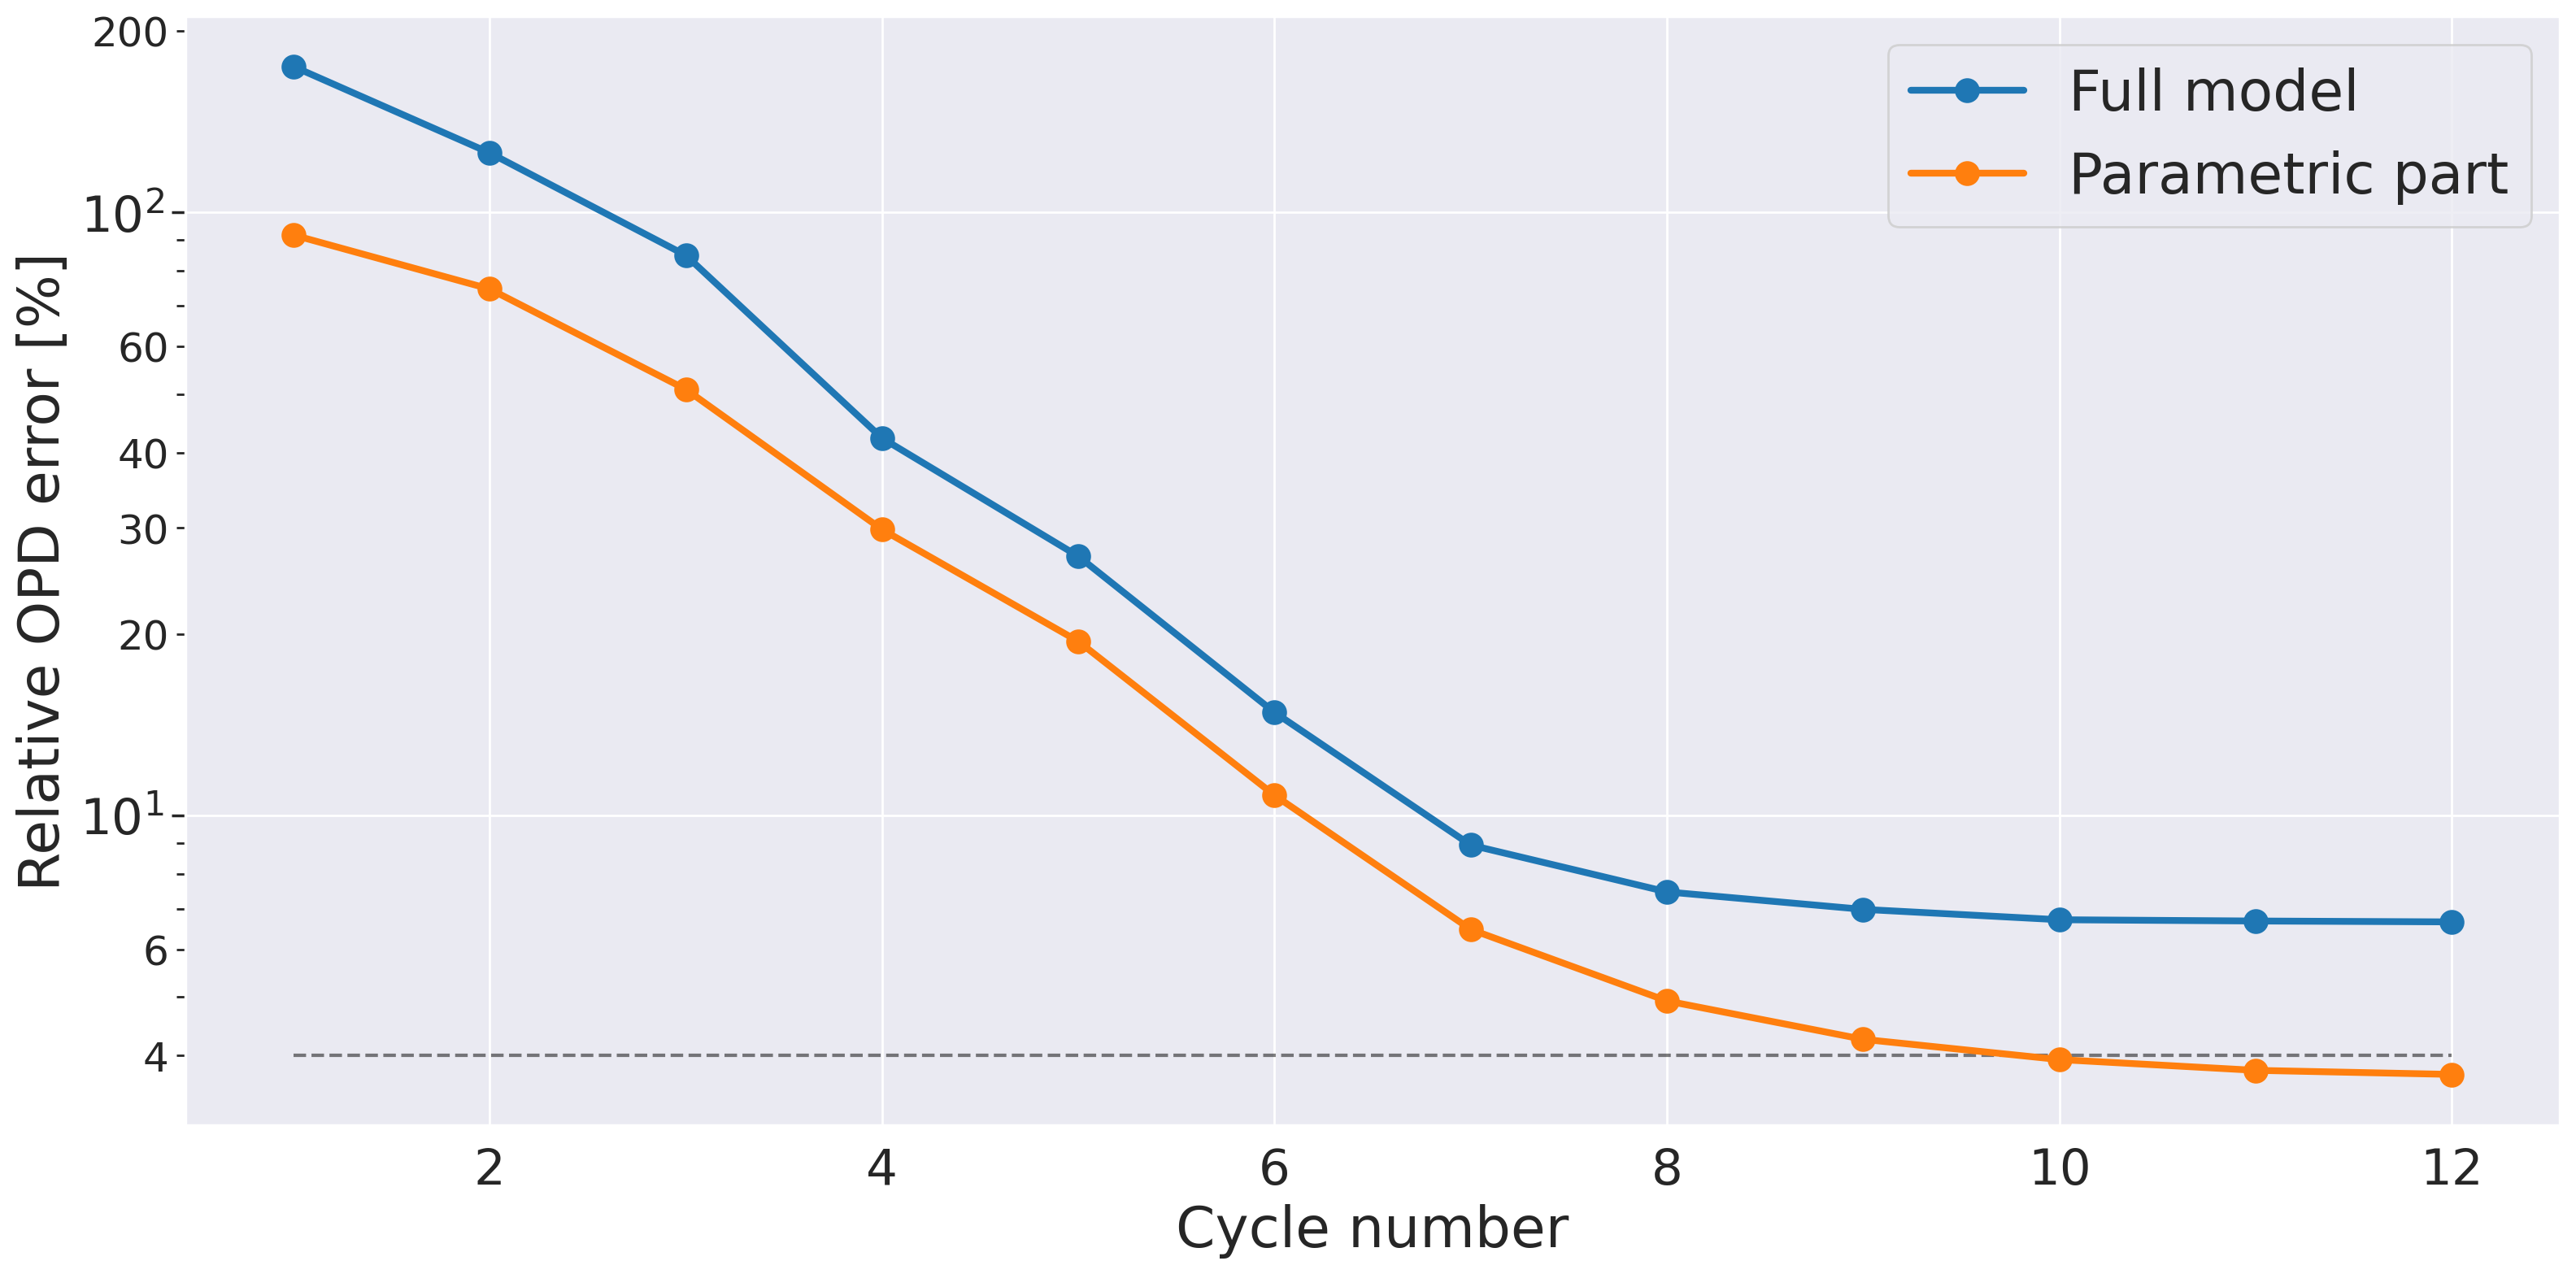

In [10]:
# OPD
cmap = plt.get_cmap('tab10')

text_fontsize = 25
maj_tick_size = 22
min_tick_size = 18

plt.figure(figsize=(16,8))
ax = plt.gca()

plt.plot(
    np.arange(1,len(test_opd_rel_results[0])+1),
    4. * np.ones(len(test_opd_rel_results[0])),
    color='black',
    linestyle='--',
    marker='',
    alpha=0.5
)

for it, res in enumerate(test_opd_rel_results):
    plt.plot(
        np.arange(1,len(res)+1),
        res,
        color=cmap(it),
        label=labels[it],
        linewidth=3,
        markersize=10,
    )

# ax.set_ylim(1, 200)
ax.set_yscale('log')
ax.yaxis.tick_left()
plt.legend(fontsize=text_fontsize)
plt.ylabel('Relative OPD error [%]', fontsize=text_fontsize)
plt.xlabel('Cycle number', fontsize=text_fontsize)


ax.tick_params(axis='both', which='major', labelsize=maj_tick_size)
ax.tick_params(axis='y', which='minor', labelsize=min_tick_size)
formatter = mtick.LogFormatter(labelOnlyBase=False, minor_thresholds=(3, 0.4))
ax.yaxis.set_minor_formatter(formatter)

plt.tight_layout()
# plt.savefig(
#     '{:s}{:s}'.format(save_dir, 'cycle_evol_rel_opd_error.pdf'),
#     bbox_inches='tight',
#     dpi=300
# )
plt.show()



## Observation resolution

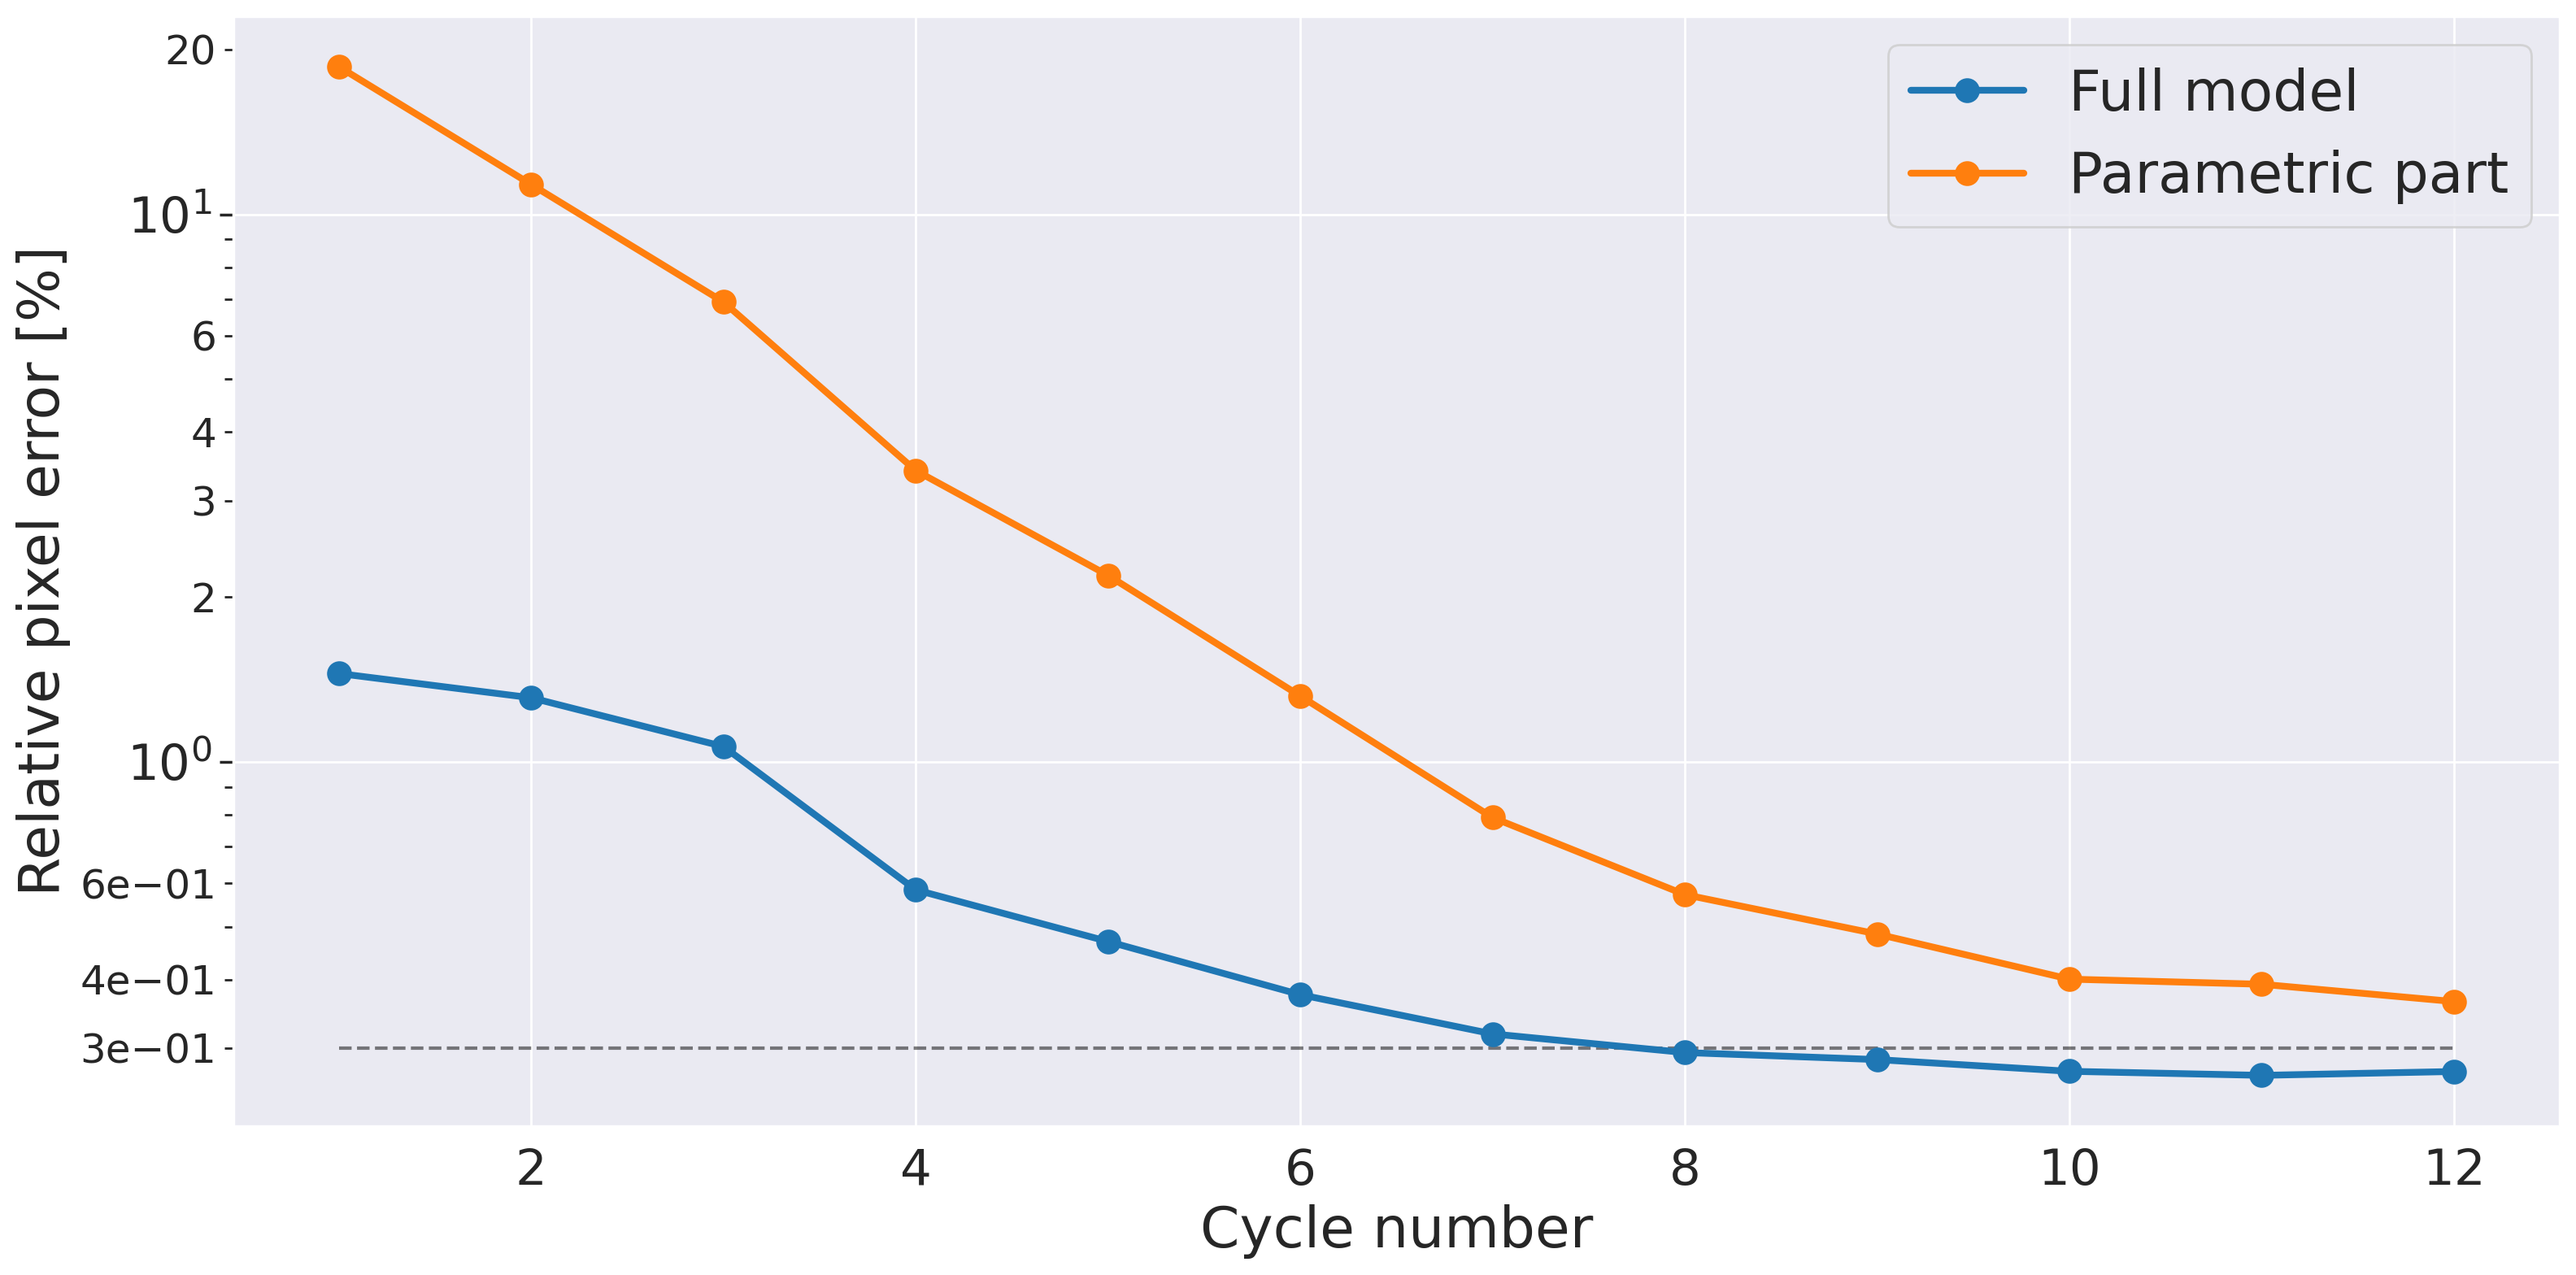

In [11]:

# Pixel
cmap = plt.get_cmap('tab10')

text_fontsize = 25
maj_tick_size = 22
min_tick_size = 18

plt.figure(figsize=(16,8))
ax = plt.gca()

plt.plot(
    np.arange(1,len(test_pix_rel_results[0])+1),
    0.3 * np.ones(len(test_pix_rel_results[0])),
    color='black',
    linestyle='--',
    marker='',
    alpha=0.5
)

for it, res in enumerate(test_pix_rel_results):
    plt.plot(
        np.arange(1,len(res)+1),
        res,
        color=cmap(it),
        label=labels[it],
        linewidth=3,
        markersize=10,
    )

# ax.set_ylim(1, 200)
ax.set_yscale('log')
ax.yaxis.tick_left()
plt.legend(fontsize=text_fontsize)
plt.ylabel('Relative pixel error [%]', fontsize=text_fontsize)
plt.xlabel('Cycle number', fontsize=text_fontsize)


ax.tick_params(axis='both', which='major', labelsize=maj_tick_size)
ax.tick_params(axis='y', which='minor', labelsize=min_tick_size)
formatter = mtick.LogFormatter(labelOnlyBase=False, minor_thresholds=(3., 0.4))
# formatter = mtick.LogFormatterSciNotation(labelOnlyBase=False, minor_thresholds=(3., 0.4))

ax.yaxis.set_minor_formatter(formatter)

plt.tight_layout()
# plt.savefig(
#     '{:s}{:s}'.format(save_dir, 'cycle_evol_rel_pixel_error_obsRes.pdf'),
#     bbox_inches='tight',
#     dpi=300
# )
plt.show()




## Super resolution

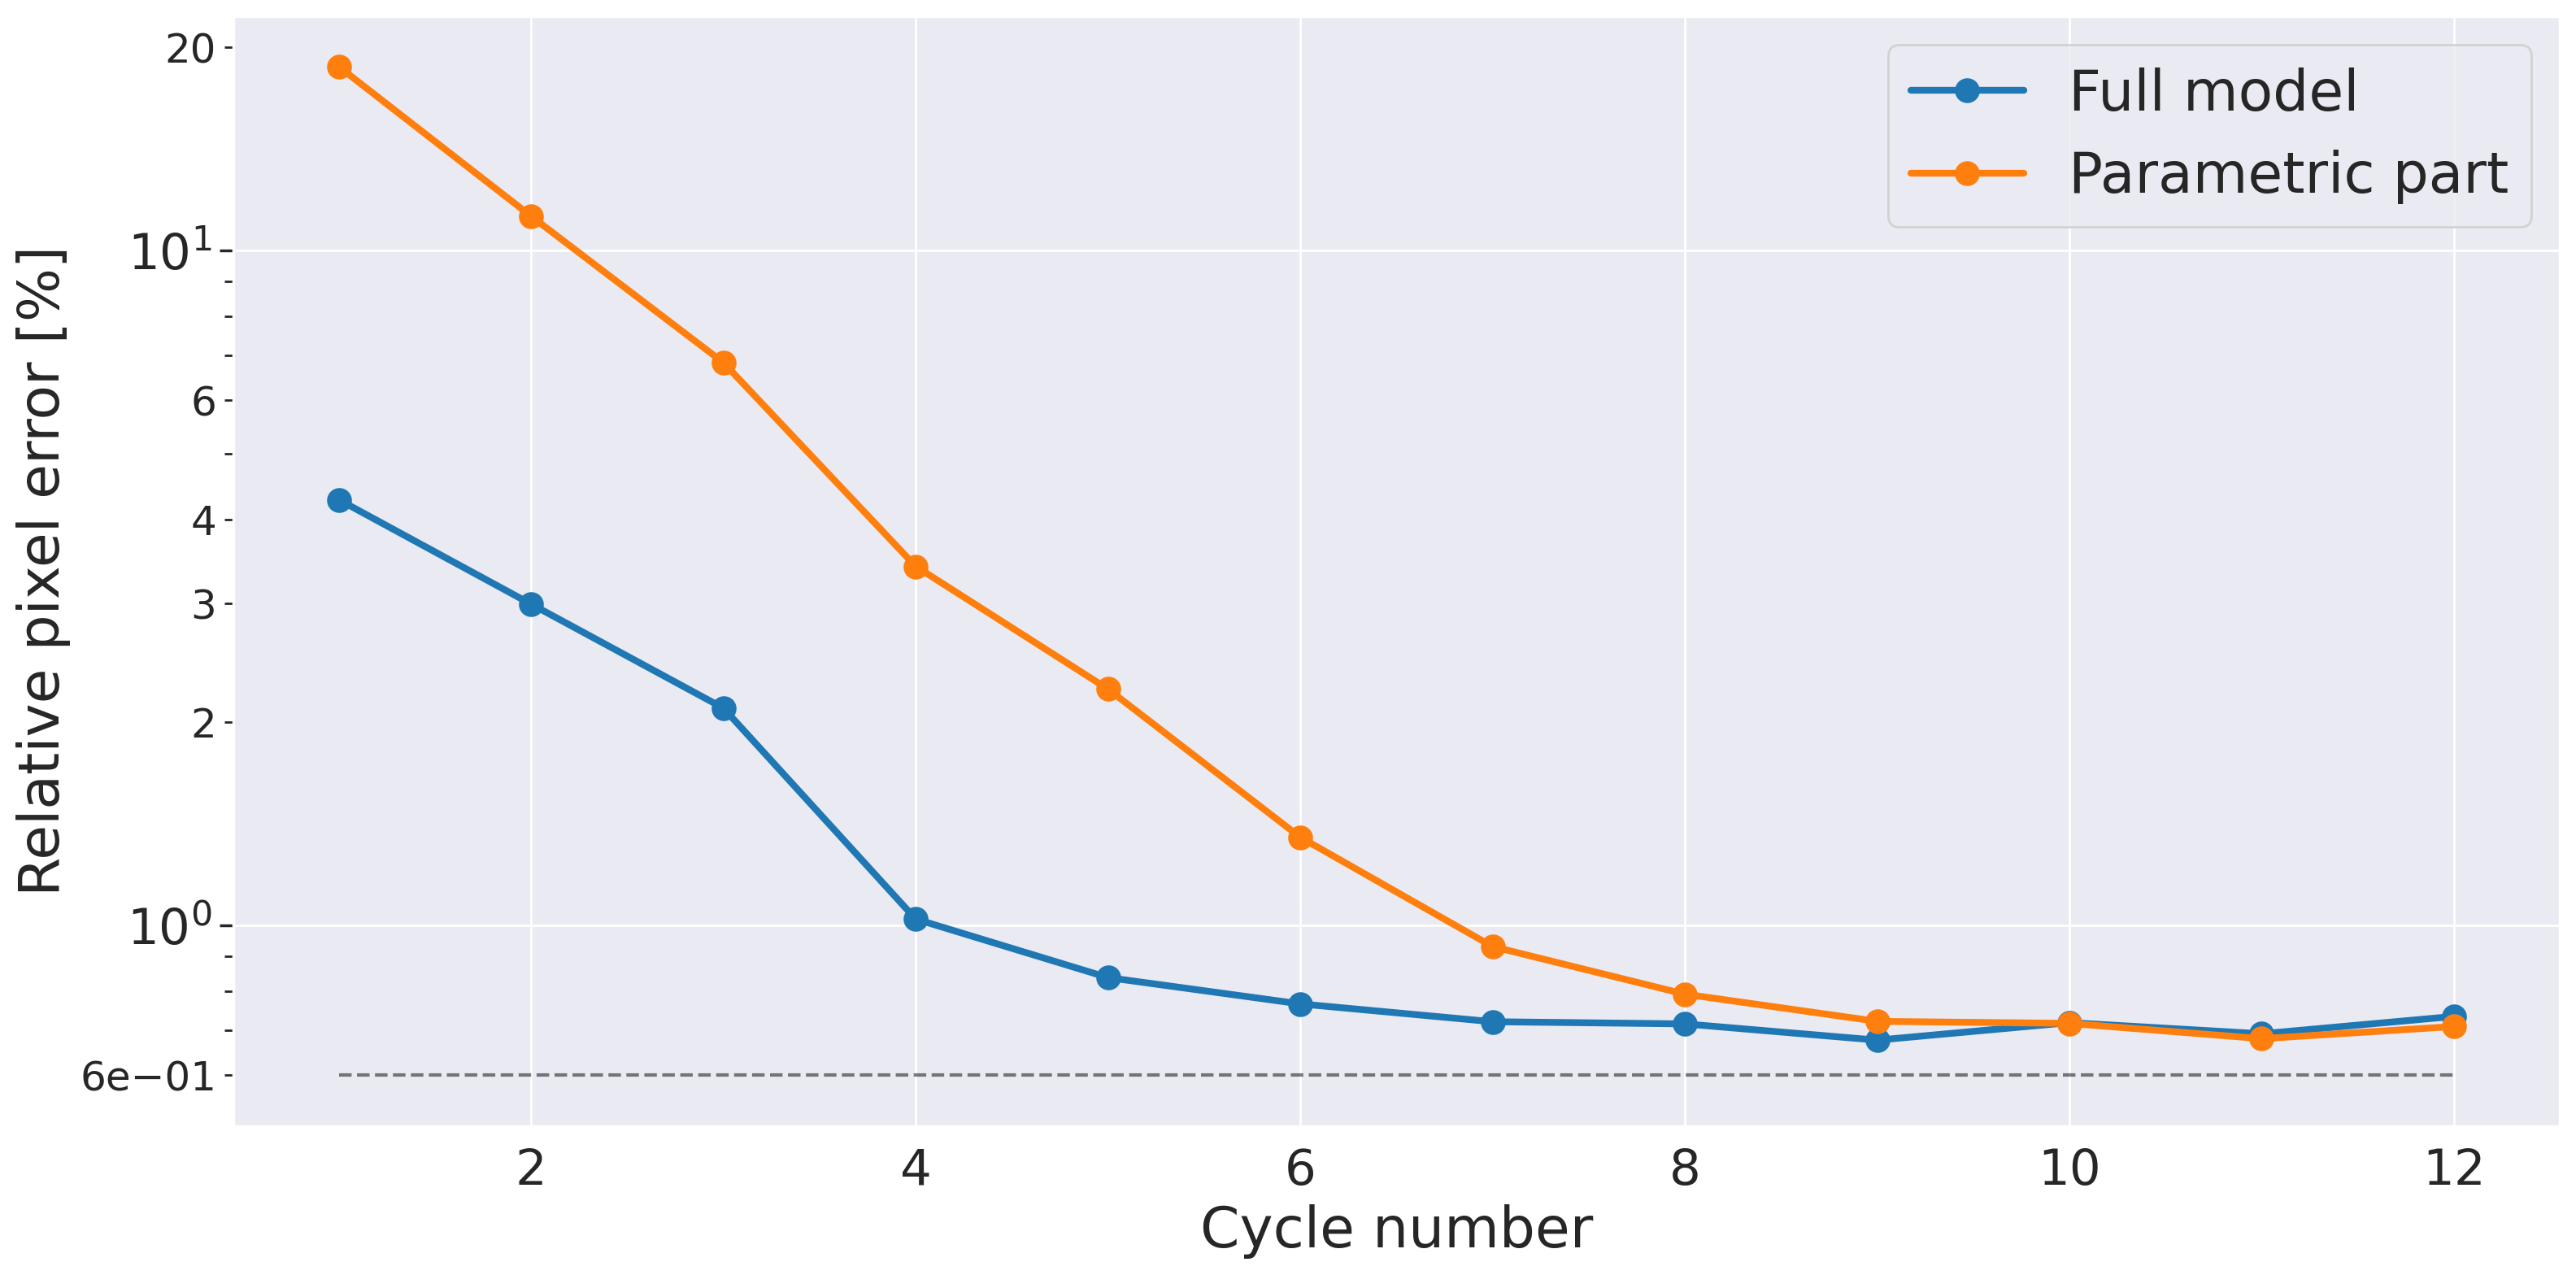

In [12]:


# SR Pixel
cmap = plt.get_cmap('tab10')

text_fontsize = 25
maj_tick_size = 22
min_tick_size = 18

plt.figure(figsize=(16,8))
ax = plt.gca()

plt.plot(
    np.arange(1,len(test_SR_pix_rel_results[0])+1),
    0.6 * np.ones(len(test_SR_pix_rel_results[0])),
    color='black',
    linestyle='--',
    marker='',
    alpha=0.5
)

for it, res in enumerate(test_SR_pix_rel_results):
    plt.plot(
        np.arange(1,len(res)+1),
        res,
        color=cmap(it),
        label=labels[it],
        linewidth=3,
        markersize=10,
    )

# ax.set_ylim(1, 200)
ax.set_yscale('log')
ax.yaxis.tick_left()
plt.legend(fontsize=text_fontsize)
plt.ylabel('Relative pixel error [%]', fontsize=text_fontsize)
plt.xlabel('Cycle number', fontsize=text_fontsize)

ax.tick_params(axis='both', which='major', labelsize=maj_tick_size)
ax.tick_params(axis='y', which='minor', labelsize=min_tick_size)
formatter = mtick.LogFormatter(labelOnlyBase=False, minor_thresholds=(3., 0.4))
# formatter = mtick.LogFormatterSciNotation(labelOnlyBase=False, minor_thresholds=(3., 0.4))
ax.yaxis.set_minor_formatter(formatter)

plt.tight_layout()
# plt.savefig(
#     '{:s}{:s}'.format(save_dir, 'cycle_evol_rel_pixel_error_SuperRes.pdf'),
#     bbox_inches='tight',
#     dpi=300
# )
plt.show()



## Both resolutions

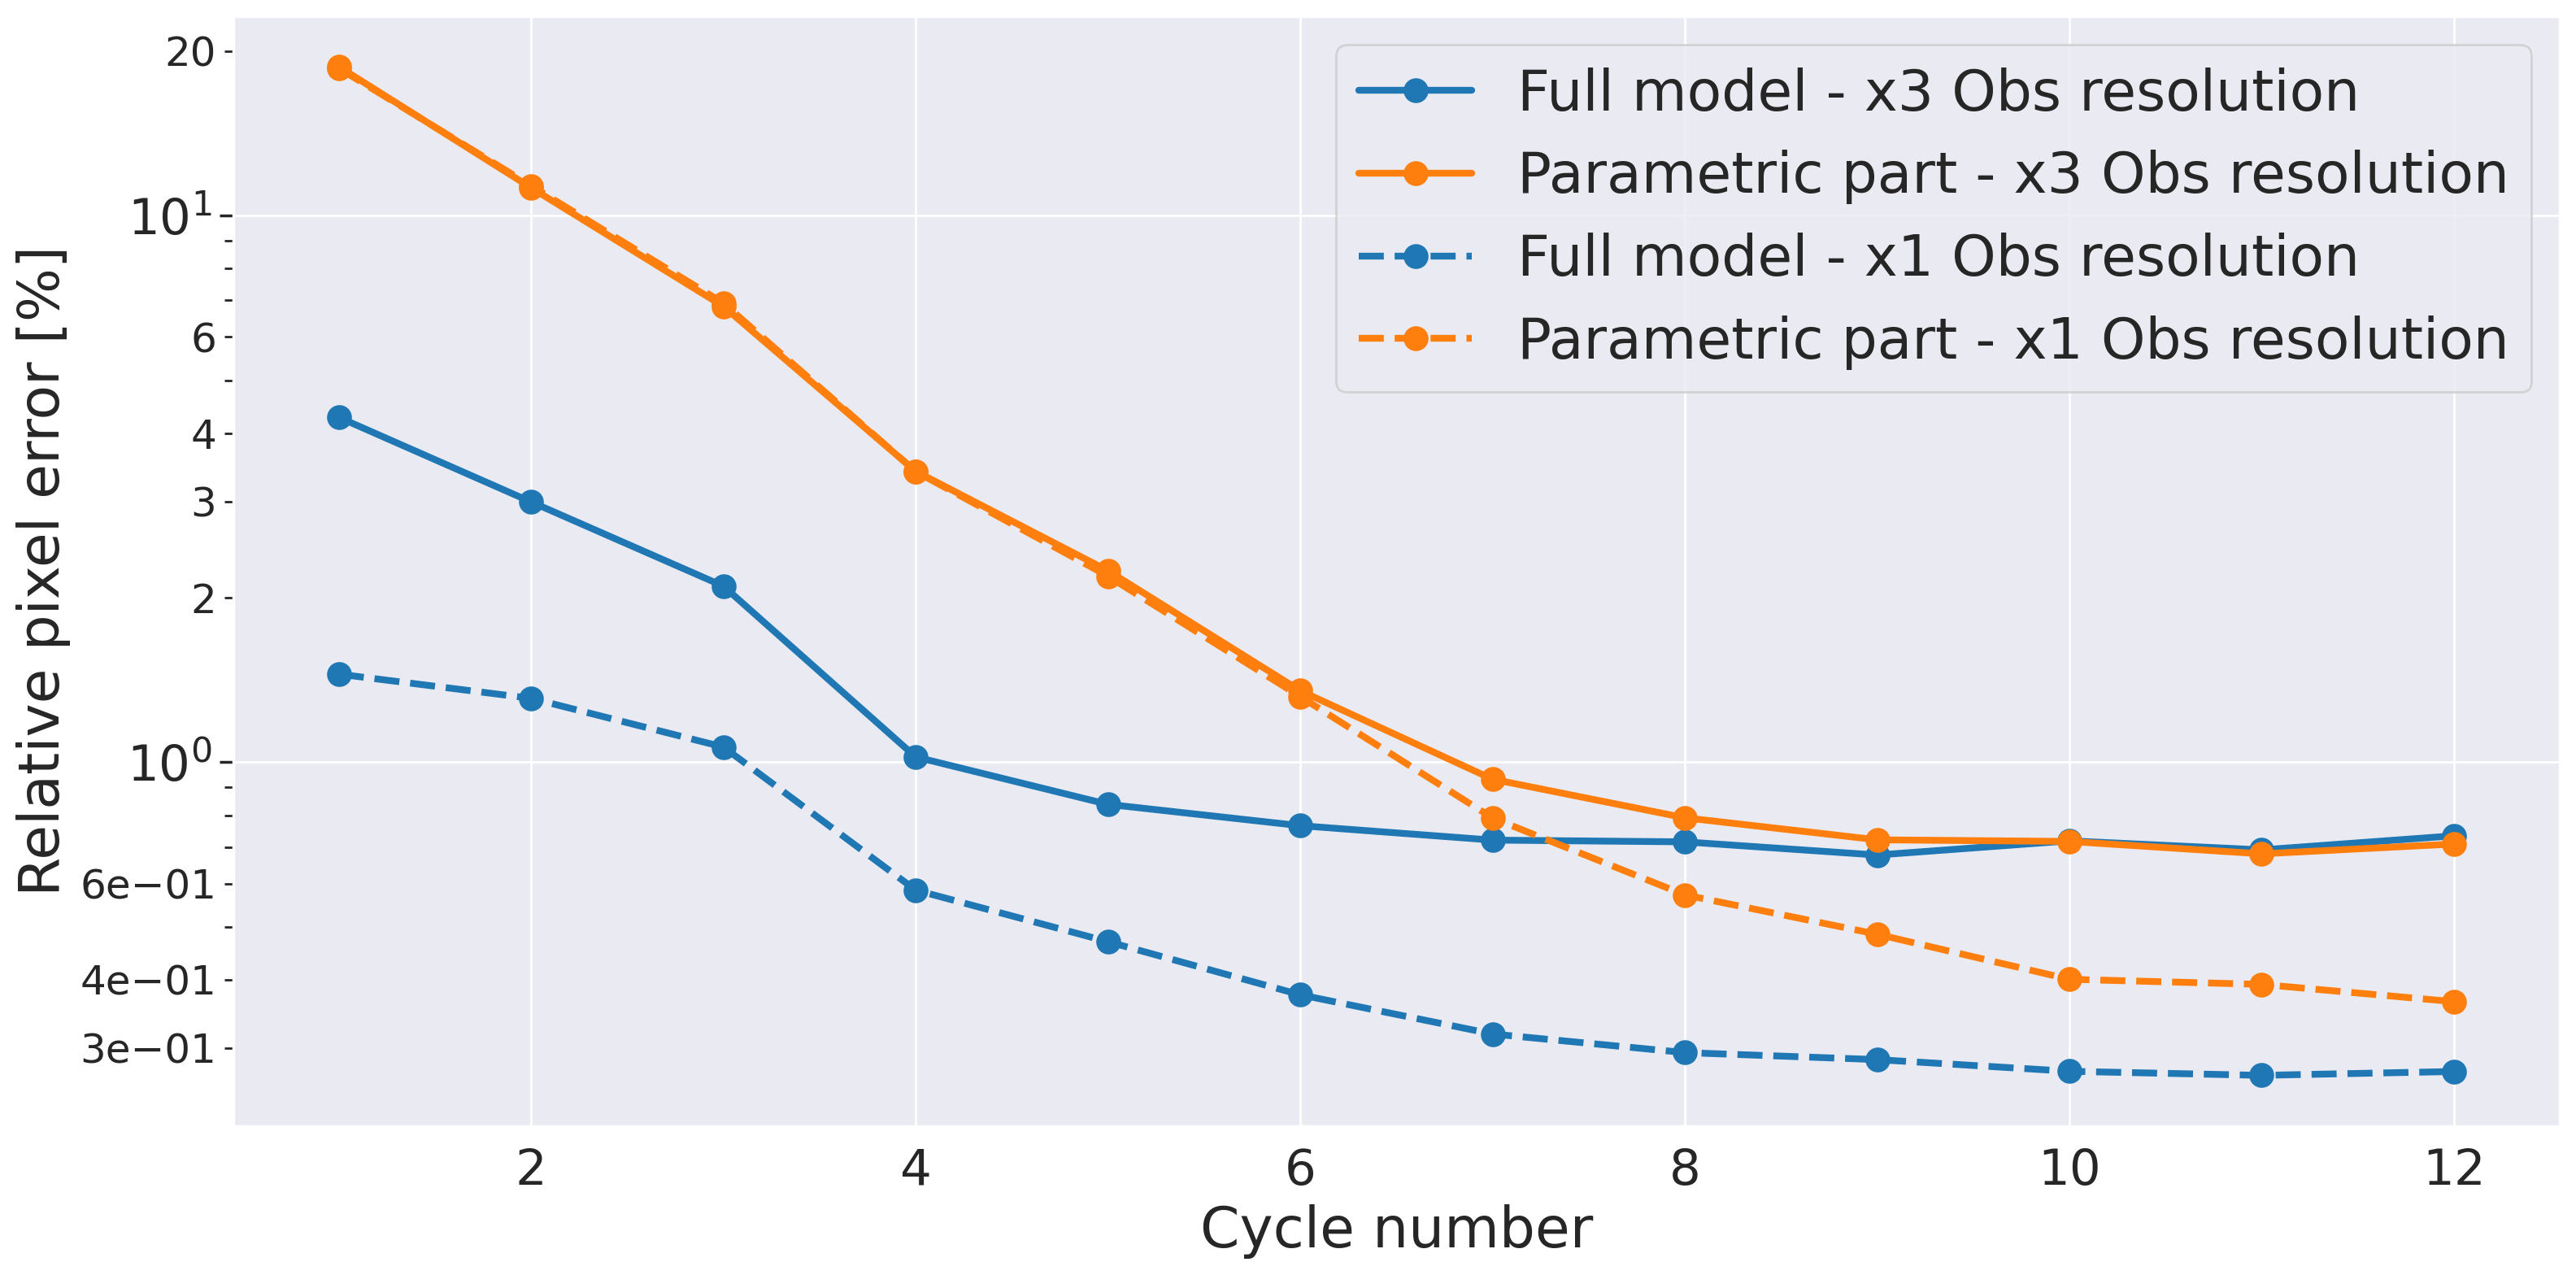

In [13]:
labels_SR = [
    'Full model - x3 Obs resolution',
    'Parametric part - x3 Obs resolution',
]
labels_obsR = [
    'Full model - x1 Obs resolution',
    'Parametric part - x1 Obs resolution',
]

# Both pixel resolutions
cmap = plt.get_cmap('tab10')

text_fontsize = 25
maj_tick_size = 22
min_tick_size = 18

plt.figure(figsize=(16,8))
ax = plt.gca()


for it, res in enumerate(test_SR_pix_rel_results):
    plt.plot(
        np.arange(1,len(res)+1),
        res,
        color=cmap(it),
        label=labels_SR[it],
        linewidth=3,
        markersize=10,
    )

for it, res in enumerate(test_pix_rel_results):
    plt.plot(
        np.arange(1,len(res)+1),
        res,
        color=cmap(it),
        label=labels_obsR[it],
        linestyle='dashed',
        linewidth=3,
        markersize=10,
    )

# ax.set_ylim(1, 200)
ax.set_yscale('log')
ax.yaxis.tick_left()
plt.legend(fontsize=text_fontsize)
plt.ylabel('Relative pixel error [%]', fontsize=text_fontsize)
plt.xlabel('Cycle number', fontsize=text_fontsize)

ax.tick_params(axis='both', which='major', labelsize=maj_tick_size)
ax.tick_params(axis='y', which='minor', labelsize=min_tick_size)
formatter = mtick.LogFormatter(labelOnlyBase=False, minor_thresholds=(3., 0.4))
# formatter = mtick.LogFormatterSciNotation(labelOnlyBase=False, minor_thresholds=(3., 0.4))
ax.yaxis.set_minor_formatter(formatter)

plt.tight_layout()
# plt.savefig(
#     '{:s}{:s}'.format(save_dir, 'cycle_evol_rel_pixel_error_bothRes.pdf'),
#     bbox_inches='tight',
#     dpi=300
# )
plt.show()



## Shape metrics: e1, e2

/tmp/ipykernel_398028/2019980677.py:116: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(
/tmp/ipykernel_398028/2019980677.py:116: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(
/disk/xray0/tl3/miniconda3/envs/tf2_7_conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


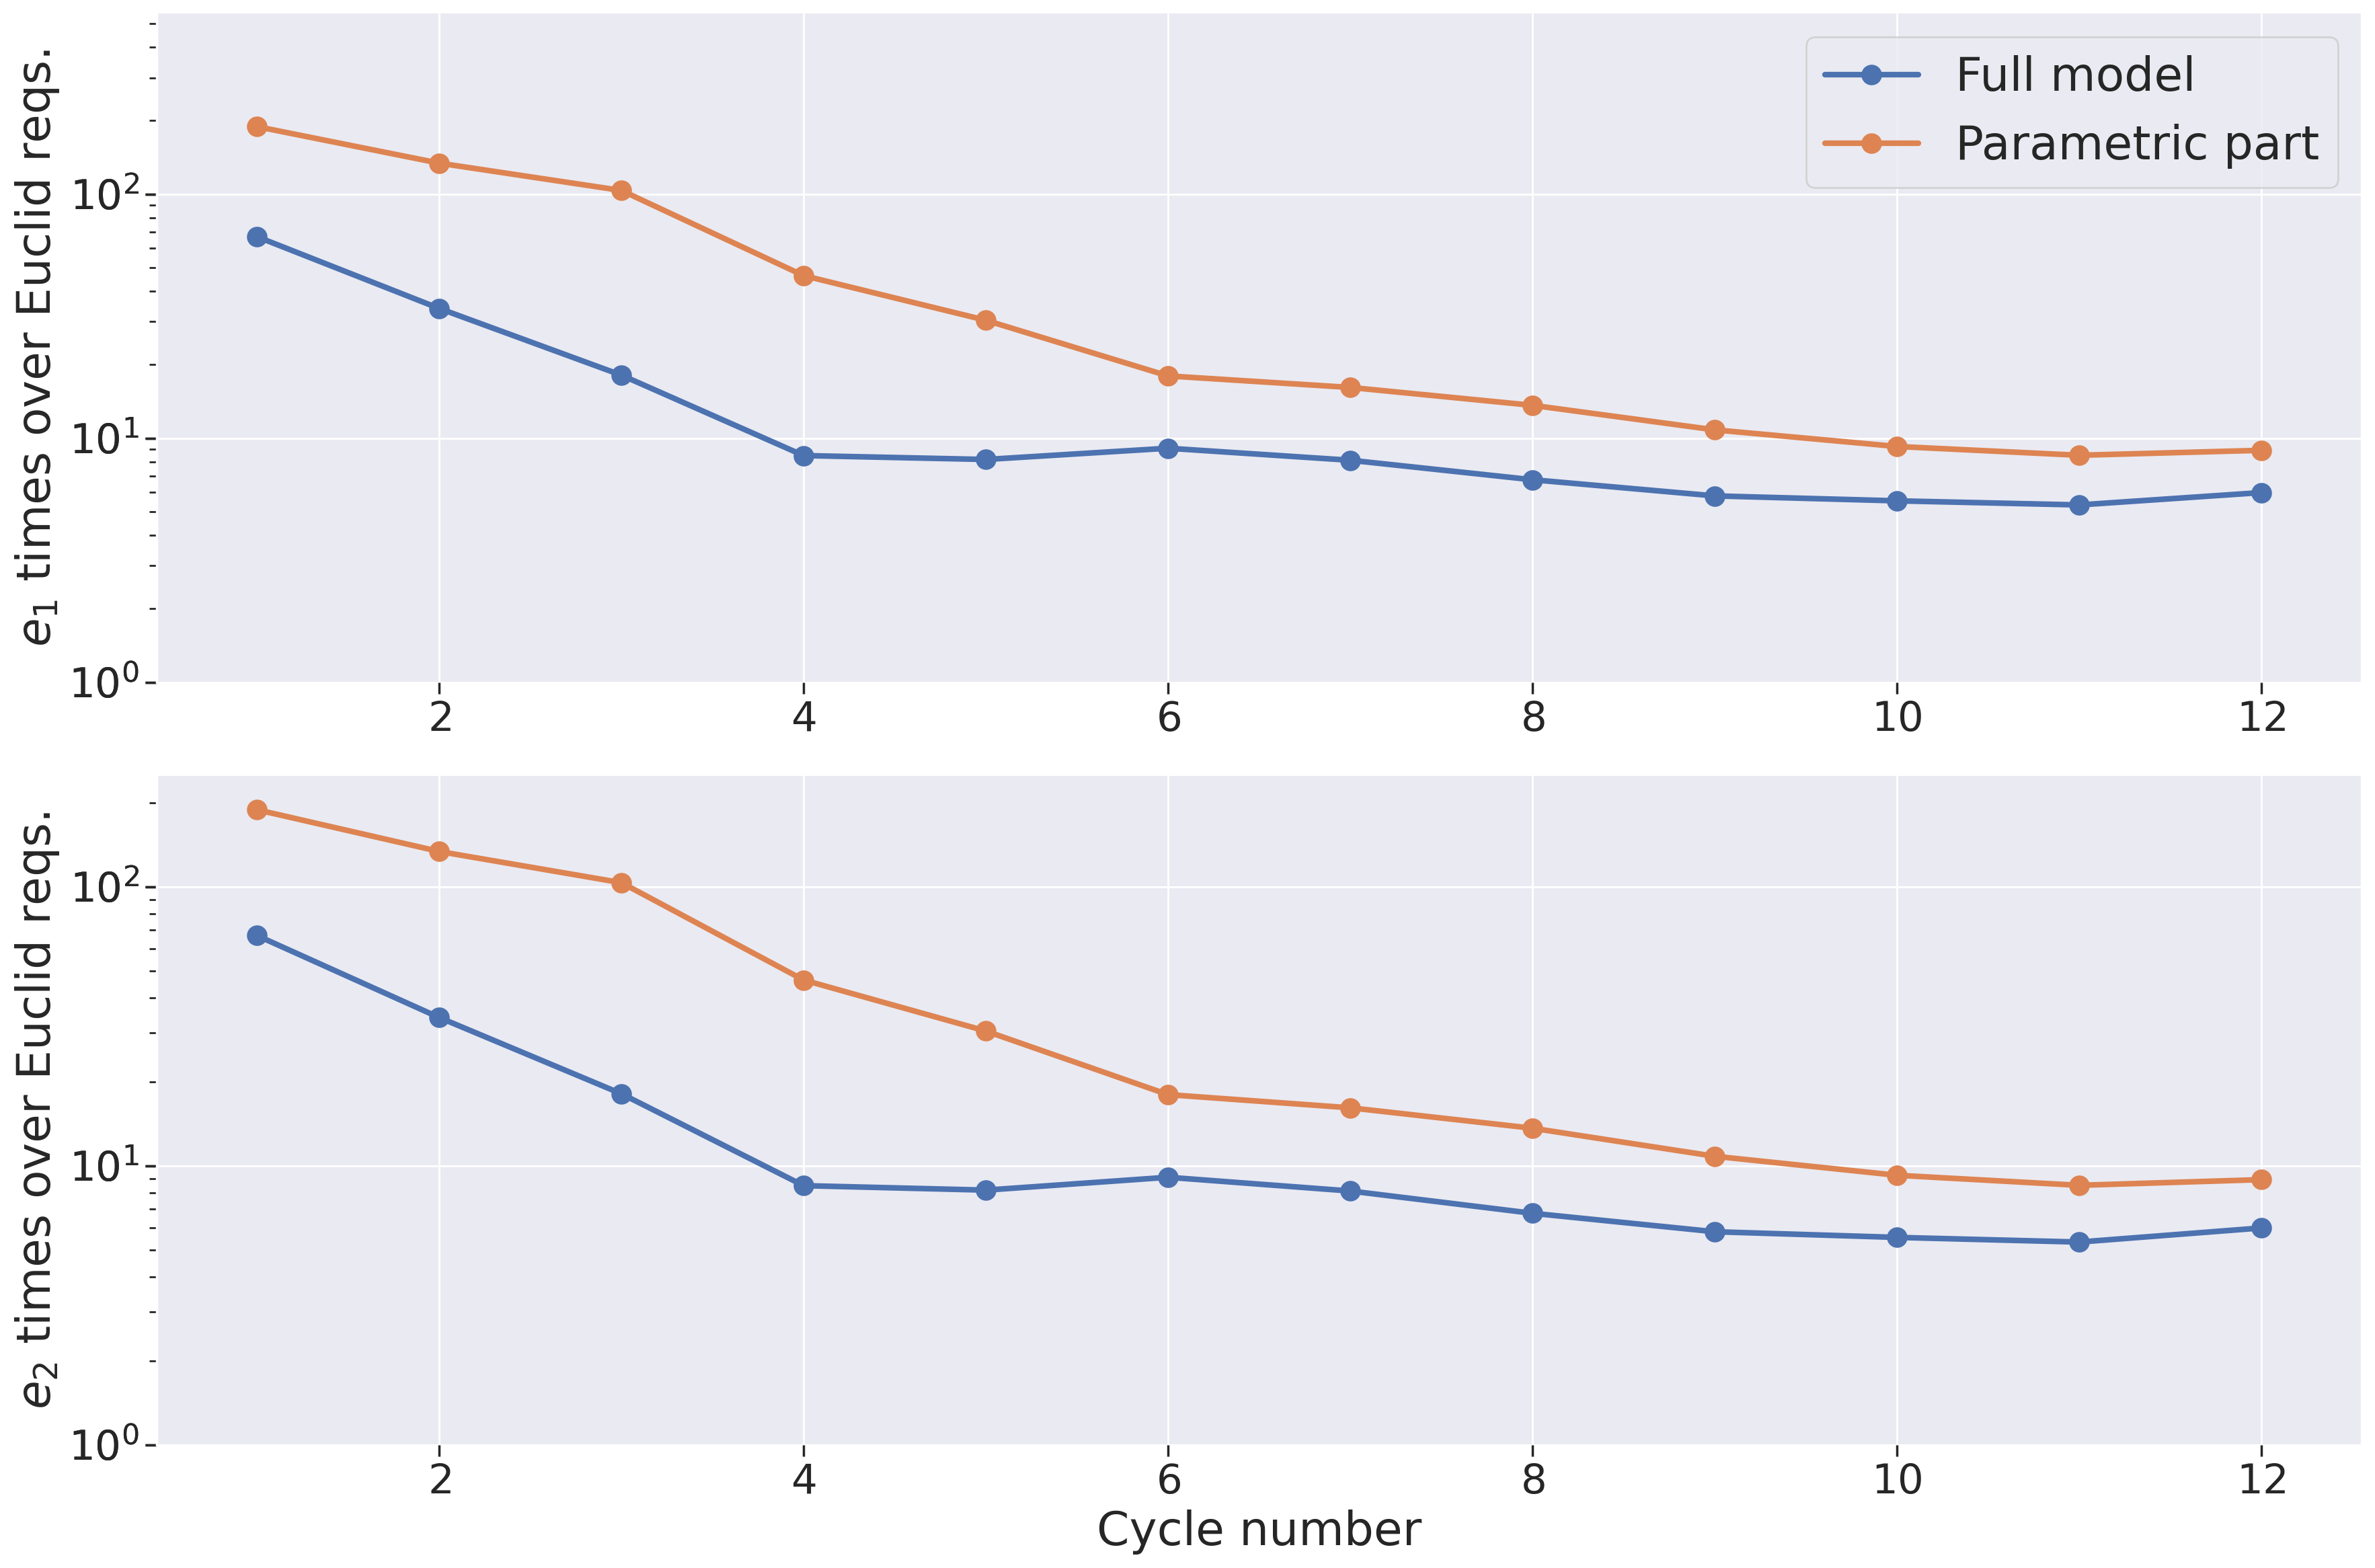

In [32]:

ncycles = np.arange(1,len(test_SR_pix_rel_results[0])+1)

# Define style
define_plot_style()

fig = plt.figure(figsize=(18,12))
gs = mpl.gridspec.GridSpec(2, 1, height_ratios=[1, 1], hspace=0.08) 


sns.set(font_scale=1.5)

ax0 = plt.subplot(gs[0])


kwargs = dict(linewidth=3, alpha=1, markersize=10)

ax0.plot(ncycles, full_NP_model_e1_rel_euclid, c=sns.color_palette()[0], label='Full model', **kwargs)
ax0.plot(ncycles, param_NP_model_e1_rel_euclid, c=sns.color_palette()[1], label='Parametric part', **kwargs)


ax0.set_ylim(1, 550)  # most of the data

ax0.legend(prop={'size': text_fontsize})#, loc='upper right')

ax0.set_yscale('log')
# ax0.set_xscale('log')
# plt.xticks(ncycles)
ax0.get_xaxis().set_major_formatter(mtick.ScalarFormatter())

ax0.get_xaxis().set_tick_params(which='minor', size=0)
ax0.get_xaxis().set_tick_params(which='minor', width=0) 

ax0.spines['bottom'].set_visible(False)
ax0.spines['top'].set_visible(False)

ax0.xaxis.tick_bottom()
ax0.yaxis.tick_left()

# plt.minorticks_on()
ax0.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
ax0.yaxis.major.formatter._useMathText = True
ax0.xaxis.major.formatter._useMathText = True

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(0.1,1.0, ))
ax0.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1 )) 
ax0.yaxis.set_minor_locator(locmin)
ax0.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

ax0.tick_params(axis='both', which='major', labelsize=maj_tick_size)
# ax0.tick_params(axis='y', which='major', labelsize=maj_tick_size)
# ax0.tick_params(axis='x', which='major', labelsize=maj_tick_size)

ax0.set_ylabel(r'$e_1$ times over Euclid reqs.', fontsize = text_fontsize)   
# ax0.yaxis.set_label_coords(-0.05,0.5, transform=ax1.transAxes)

# ax1.set_xlabel('Relative error in the prior [%]', fontsize = 20)

ax1 = plt.subplot(gs[1])

kwargs = dict(linewidth=3, alpha=1, markersize=10)

ax1.plot(ncycles, full_NP_model_e1_rel_euclid, c=sns.color_palette()[0], label='Full model', **kwargs)
ax1.plot(ncycles, param_NP_model_e1_rel_euclid, c=sns.color_palette()[1], label='Parametric part', **kwargs)


ax1.set_ylim(1, 250)  # most of the data

# ax1.legend(prop={'size': 18})#, loc='upper right')

ax1.set_yscale('log')


# ax1.set_xscale('log')
# plt.xticks(ncycles)
ax1.get_xaxis().set_major_formatter(mtick.ScalarFormatter())

ax1.get_xaxis().set_tick_params(which='minor', size=0)
ax1.get_xaxis().set_tick_params(which='minor', width=0) 

ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()

# plt.minorticks_on()
ax1.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
ax1.yaxis.major.formatter._useMathText = True
ax1.xaxis.major.formatter._useMathText = True
ax1.tick_params(axis='both', which='major', labelsize=maj_tick_size)
# ax1.tick_params(axis='y', which='major', labelsize=maj_tick_size)
# ax1.tick_params(axis='x', which='major', labelsize=maj_tick_size)

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(0.1,1.0, ))
ax1.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1 )) 
ax1.yaxis.set_minor_locator(locmin)
ax1.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

ax1.set_ylabel(r'$e_2$ times over Euclid reqs.', fontsize = text_fontsize)   
# ax1.yaxis.set_label_coords(-0.05,0.5, transform=ax1.transAxes)
ax1.set_xlabel('Cycle number', fontsize = text_fontsize)

gs.tight_layout(fig)
# plt.savefig(
#     '{:s}{:s}'.format(save_dir, 'cycle_evol_rel_e1e2_errors.pdf'),
#     bbox_inches='tight',
#     dpi=300
# )
plt.show()





## Shape metrics: R2

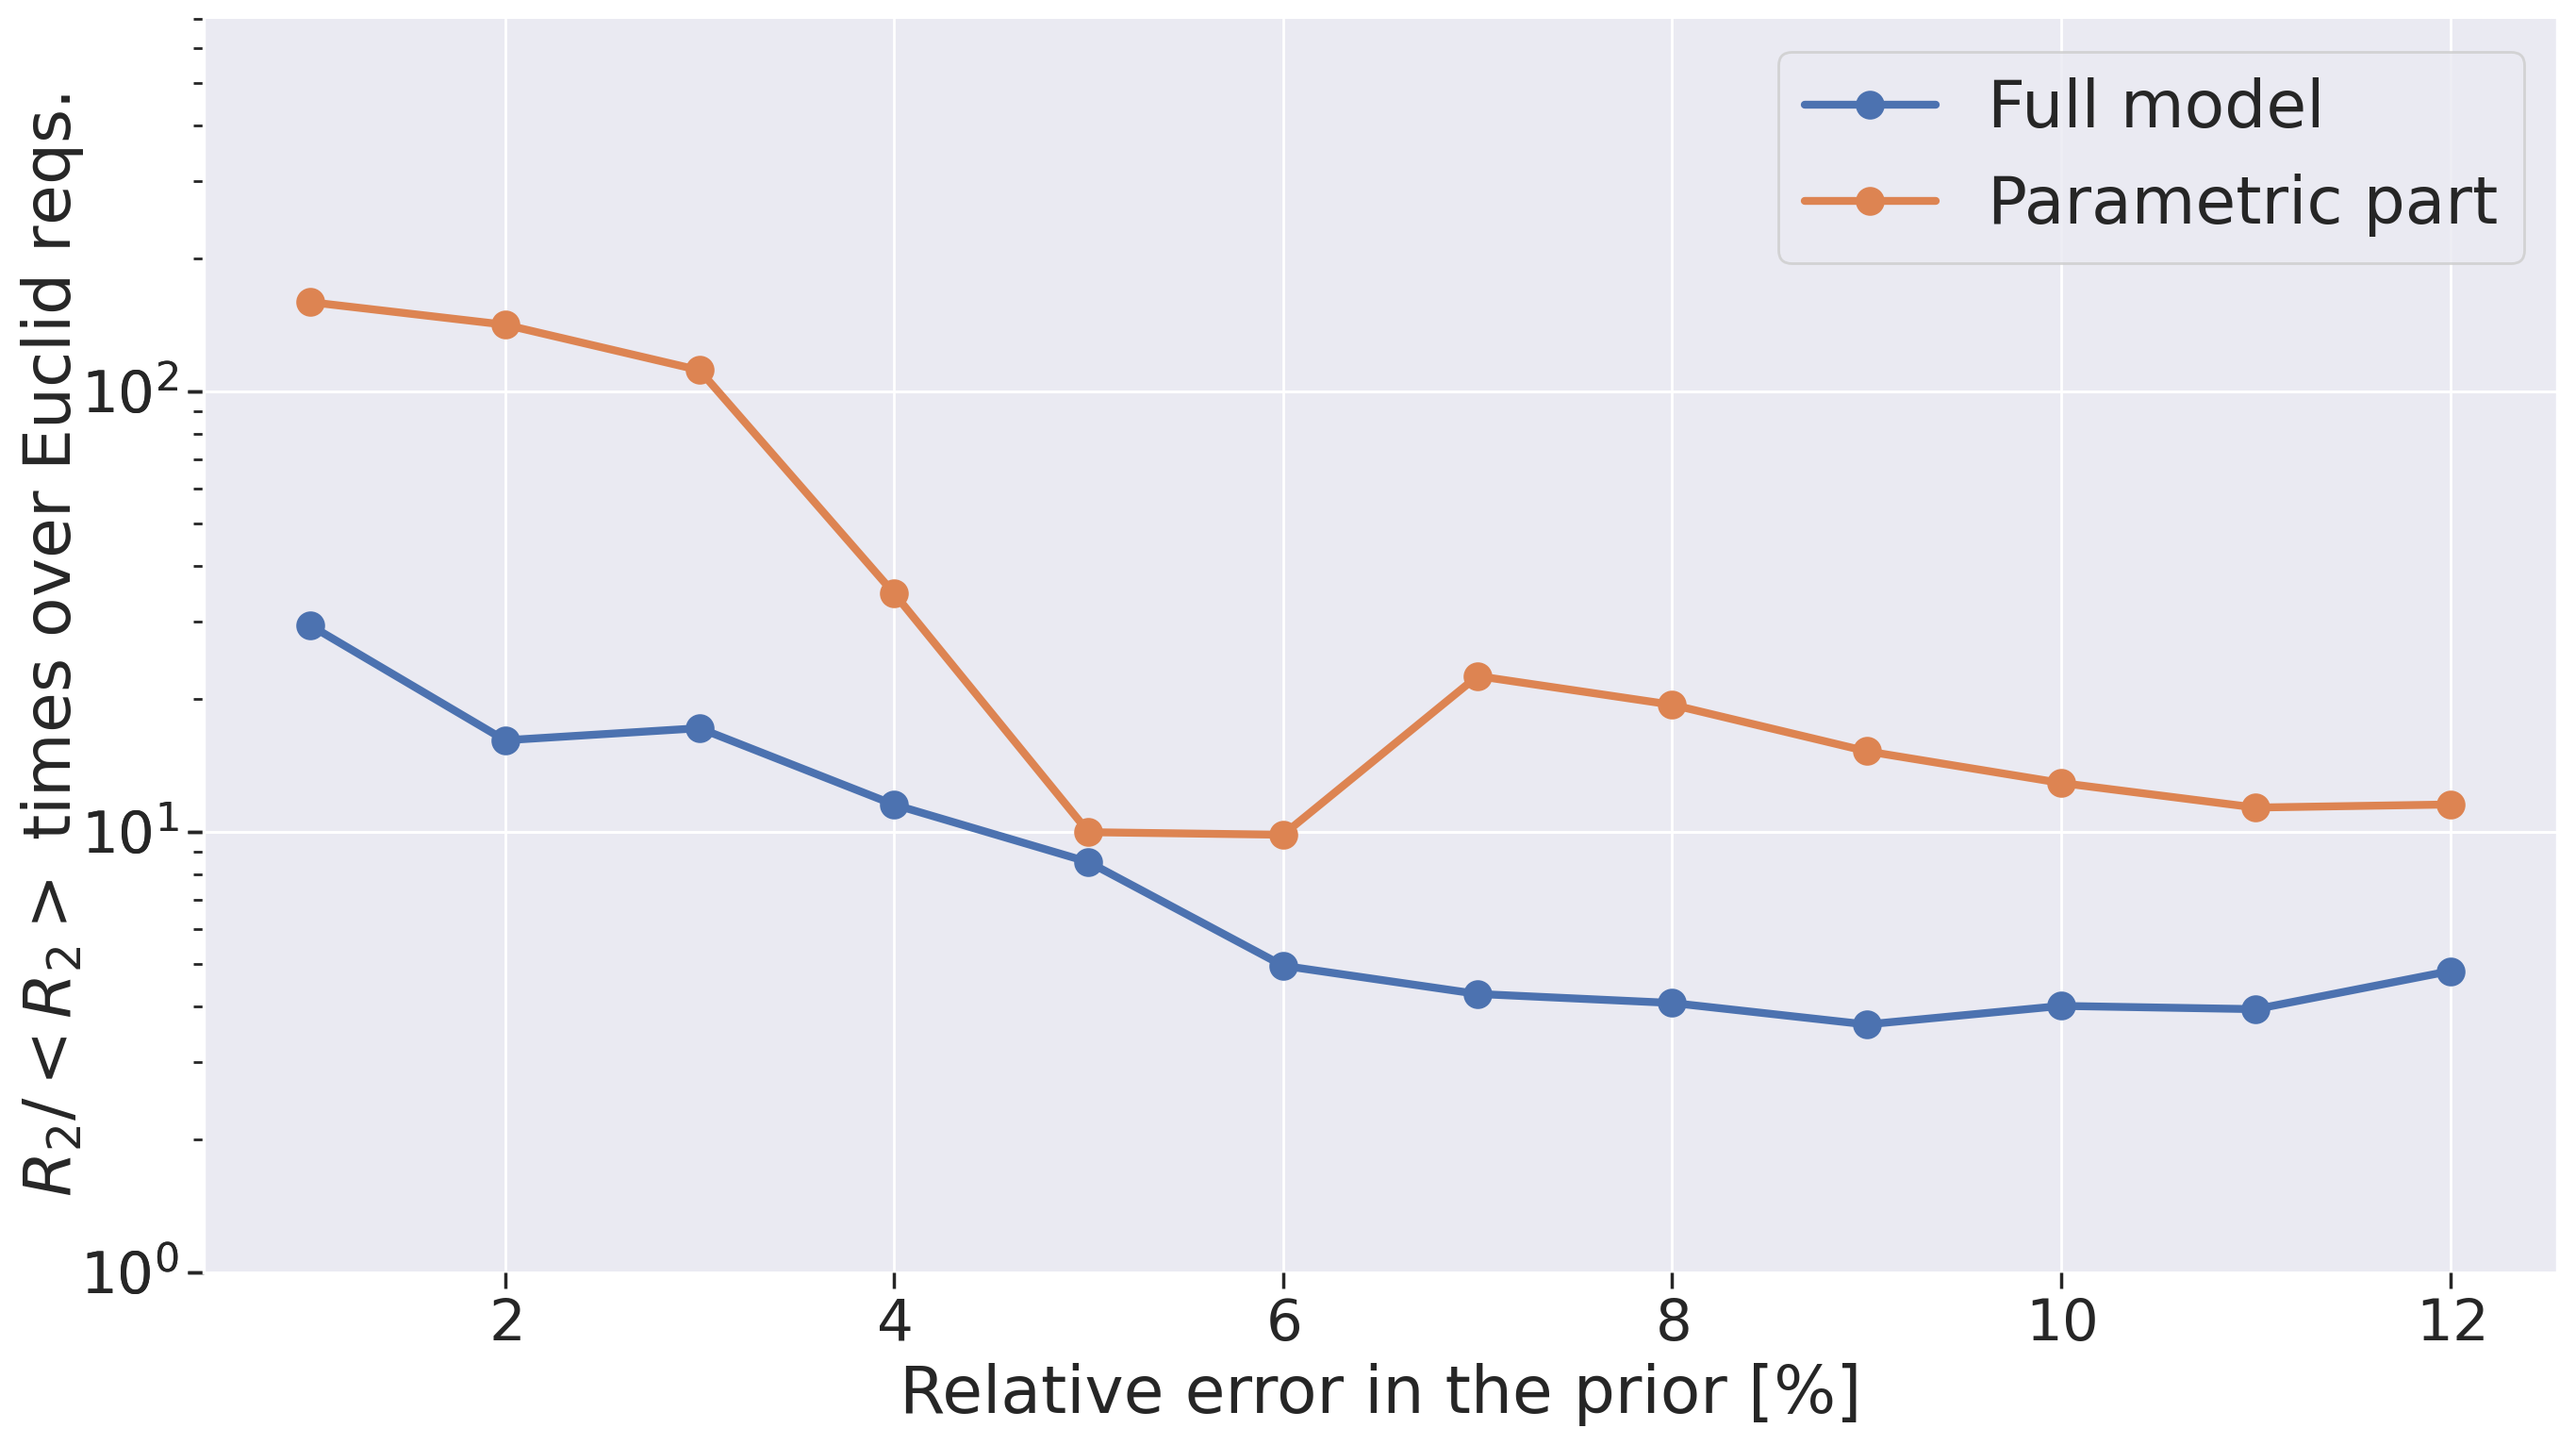

In [35]:


ncycles = np.arange(1,len(test_SR_pix_rel_results[0])+1)

# Define style
define_plot_style()
sns.set(font_scale=1.5)


fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot()

kwargs = dict(linewidth=3, alpha=1, markersize=10)

ax1.plot(ncycles, full_NP_model_R2_rel_euclid, c=sns.color_palette()[0], label='Full model', **kwargs)
ax1.plot(ncycles, param_NP_model_R2_rel_euclid, c=sns.color_palette()[1], label='Parametric part', **kwargs)


ax1.set_ylim(1, 700)  # most of the data

ax1.legend(prop={'size': text_fontsize})#, loc='upper right')

ax1.set_yscale('log')
# ax1.set_xscale('log')
# plt.xticks(prior_error_per_list[:top_el])
ax1.get_xaxis().set_major_formatter(mtick.ScalarFormatter())

ax1.get_xaxis().set_tick_params(which='minor', size=0)
ax1.get_xaxis().set_tick_params(which='minor', width=0) 

ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()

# plt.minorticks_on()
ax1.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
ax1.yaxis.major.formatter._useMathText = True
ax1.xaxis.major.formatter._useMathText = True

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(0.1,1.0, ))
ax1.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1 )) 
ax1.yaxis.set_minor_locator(locmin)
ax1.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

ax1.tick_params(axis='both', which='major', labelsize=maj_tick_size)

ax1.set_ylabel(r'$R_2 / <R_2>$ times over Euclid reqs.', fontsize = text_fontsize)   
ax1.yaxis.set_label_coords(-0.05, 0.5, transform=ax1.transAxes)
ax1.set_xlabel('Relative error in the prior [%]', fontsize = text_fontsize)


# plt.savefig(
#     '{:s}{:s}'.format(save_dir, 'cycle_evol_rel_R2_error.pdf'),
#     bbox_inches='tight',
#     dpi=300
# )
plt.show()



